<a href="https://colab.research.google.com/github/Daniel-F78/SSN/blob/main/Tarea_2_M%C3%A9todos_Num%C3%A9ricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1: Newton

a) Escribir ecuaciones de evolución de espacio y velocidad generales de Feynmann. Compararlas con velocidad Verlet. Voy a hacer un oscilador armónico.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Método Freynmamm. Primero definimos condiciones iniciales y las listas de las magnitudes.

In [2]:
x0=1
v0=0
t0=0
dt=0.001
ntot=10000
x=np.zeros(ntot+1)
v=np.zeros(ntot+1)
t=np.zeros(ntot+1)
x[0]=x0
v[0]=v0
t[0]=t0
a=-x[0]

Ponemos las fórmulas:

In [3]:
vF=v[0]+a*(dt/2)
x[1]=x0+v0*(dt)+a/2*(dt)**2
t[1]=t[0]+dt
a1=-x[1]
print("x=",x[1])
print("v=",vF)
print("a=",a)
print("a1=",a1)

x= 0.9999995
v= -0.0005
a= -1.0
a1= -0.9999995


Método Verlet. Definimos la aceleración media:

In [4]:
am=(a+a1)/2

Ponemos las fórmulas:

In [5]:
xV=x[0]+v[0]*(dt)+a/2*(dt)**2
vV=v[0]+am*dt
print("x=",xV)
print("v=",vV)
print("a=",am)

x= 0.9999995
v= -0.00099999975
a= -0.99999975


Las diferencias que encontramos son principalmente la forma de tratar el diferencial del tiempo, donde en Freynmann se necesita un tiempo inicial que se va sumando a los diferenciales de tiempo, y más importante, el uso para el cálculo de la velocidad, donde se hace cada mitad de número entero. Mientras, en Verlet solo se usa el diferencial normal.

La gran diferencia se encuentra en la fórmula de la velocidad, ya que, como he explicado, en Feynmann la velocidad se calcula en un tiempo intermedio al que se hace el cálculo de espacio, cuando en Verlet se usan los mismos pasos de tiempo para velocidad y espacio, sólo que en su caso contamos con una aceleración media. Ambos casos juegan con poner un punto intermedio, pero de diferente manera.

b) Explicar por qué no hay un cálculo de energía total por paso en Feynmann y proporner una modificación implementando el cálculo.

El cálculo de energía total cada paso de tiempo no se puede hacer ya que para la energía cinética estaremos tomando la velocidad, que proviene de unos pasos de tiempo intermedio y el espacio se obtiene de unos pasos de tiempo enteros.
Se puede hacer el cálculo medio de velocidades.

Repetimos los cálculos incluyendo la energía.

In [16]:
x0=1
v0=0
t0=0
dt=0.001
ntot=1000000
m=1
k=1
E0=(m*v0**2)/2+(k*x0**2)/2
x=np.zeros(ntot+1)
v=np.zeros(ntot+1)
t=np.zeros(ntot+1)
E=np.zeros(ntot+1)
x[0]=x0
v[0]=v0
t[0]=t0
E[0]=E0
F=-k*x[0]
a=F/m
print("A t=0:","x=",x0,"v=",v0,"E=",E0)

A t=0: x= 1 v= 0 E= 0.5


Para poder tener un valor de energía en cada pasao, haciendo la propuesta de velocidad media para obtener la velocidad del paso, necesitamos exponer la velocidad al mismo tratamiento que el espacio y el tiempo, haciendo una tabla permanente, para ello denominaré el punto de 0.5dt el lugar 1 de la serie de velocidad

In [17]:
v[1]=v[0]+a*(dt/2)
x[1]=x[0]+v[1]*(dt)+a/2*dt**2
t[1]=t[0]+dt
F=-k*x[1]
a=F/m
v[2]=v[1]+a*dt
E[1]=(m*((v[1]+v[2])/2)**2)/2+(k*x[1]**2)/2
i=1
print("A t=",t[1],":","x=",x[1],"v=",v[1],"E=",E[1])

A t= 0.001 : x= 0.9999990000000001 v= -0.0005 E= 0.4999995000000001


Hacemos el paso de iteraciones y muestro todos los resultados importantes.

In [18]:
while i<ntot:
  F=-k*x[i]
  a=F/m
  v[i+1]=v[i]+a*dt
  x[i+1]=x[i]+v[i]*dt+a/2*dt**2
  t[i+1]=t[i]+dt
  E[i+1]=(m*((v[i]+v[i+1])/2)**2)/2+(k*x[i+1]**2)/2
  i=i+1
  print("Step",i,"t=",round(t[i],3),"x=",round(x[i],3),"v=",round(v[i],3),"E=",round(E[i],3))

Se han truncado las últimas 5000 líneas del flujo de salida.
Step 995001 t= 995.001 x= -0.813 v= -0.992 E= 0.823
Step 995002 t= 995.002 x= -0.814 v= -0.991 E= 0.823
Step 995003 t= 995.003 x= -0.815 v= -0.99 E= 0.823
Step 995004 t= 995.004 x= -0.816 v= -0.99 E= 0.823
Step 995005 t= 995.005 x= -0.817 v= -0.989 E= 0.823
Step 995006 t= 995.006 x= -0.818 v= -0.988 E= 0.823
Step 995007 t= 995.007 x= -0.819 v= -0.987 E= 0.823
Step 995008 t= 995.008 x= -0.82 v= -0.986 E= 0.823
Step 995009 t= 995.009 x= -0.821 v= -0.986 E= 0.823
Step 995010 t= 995.01 x= -0.822 v= -0.985 E= 0.823
Step 995011 t= 995.011 x= -0.823 v= -0.984 E= 0.823
Step 995012 t= 995.012 x= -0.824 v= -0.983 E= 0.823
Step 995013 t= 995.013 x= -0.825 v= -0.982 E= 0.823
Step 995014 t= 995.014 x= -0.826 v= -0.981 E= 0.823
Step 995015 t= 995.015 x= -0.827 v= -0.981 E= 0.823
Step 995016 t= 995.016 x= -0.828 v= -0.98 E= 0.823
Step 995017 t= 995.017 x= -0.829 v= -0.979 E= 0.823
Step 995018 t= 995.018 x= -0.83 v= -0.978 E= 0.823
Step 9950

Falta mostrar un gráfico de la Energía.

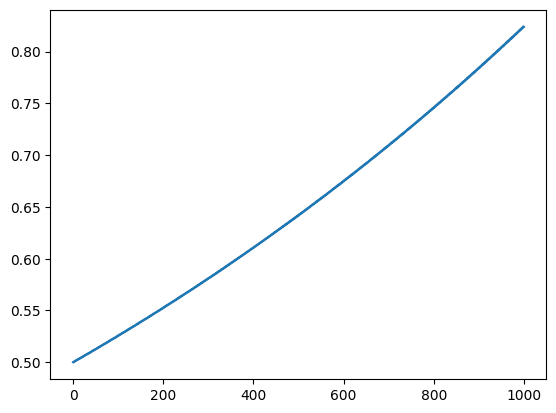

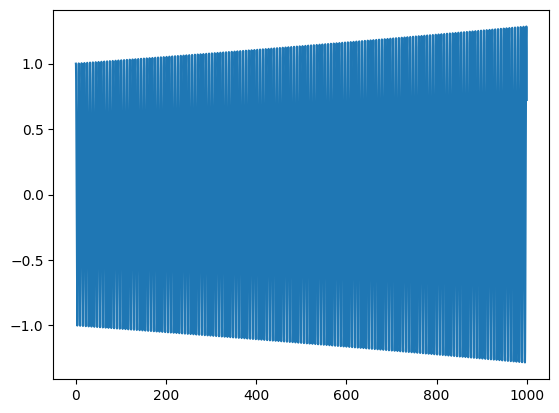

In [19]:
RE=E/E0
e=plt.plot(t,E)
plt.show(e)
d=plt.plot(t,x)
plt.show(d)

La propuesta hecha no satisface los requerimientos de conservación de la energía. Mi sistema muestra un cambio en la posición, que no sé a qué se debe.

c) Comparar la energía con el método Verlet

La comparación debería mostrar que el de Verlet sí funciona. Empezamos poniendo los datos.

In [20]:
x0=1
v0=0
t0=0
dt=0.001
ntot=1000000
m=1
k=1
E0=(m*v0**2)/2+(k*x0**2)/2
x=np.zeros(ntot+1)
v=np.zeros(ntot+1)
a=np.zeros(ntot+1)
t=np.zeros(ntot+1)
E=np.zeros(ntot+1)
x[0]=x0
v[0]=v0
t[0]=t0
E[0]=E0
F=-k*x[0]
a[0]=F/m

Ahora hacemos el primer paso.

In [21]:
x[1]=x[0]+v[0]*dt+a[0]/2*dt**2
t[1]=t[0]+dt
F=-k*x[1]
a[1]=F/m
v[1]=v[0]+(a[0]+a[1])/2*(dt)
E[1]=(m*v[1]**2)/2+(k*x[1]**2)/2
i=1
print("A t=",t[1],":","x=",x[1],"v=",v[1],"E=",E[1])

A t= 0.001 : x= 0.9999995 v= -0.00099999975 E= 0.49999999999987504


In [22]:
while i<ntot:
  x[i+1]=x[i]+v[i]*dt+a[i]/2*dt**2
  t[i+1]=t[i]+dt
  F=-k*x[i]
  a[i+1]=F/m
  v[i+1]=v[i]+(a[i]+a[i+1])/2*(dt)
  E[i+1]=(m*v[i+1]**2)/2+(k*x[i+1]**2)/2
  i=i+1
  print("Step",i,"t=",round(t[i],3),"x=",round(x[i],3),"v=",round(v[i],3),"E=",round(E[i],3))

Se han truncado las últimas 5000 líneas del flujo de salida.
Step 995001 t= 995.001 x= -1.043 v= -1.272 E= 1.353
Step 995002 t= 995.002 x= -1.044 v= -1.271 E= 1.353
Step 995003 t= 995.003 x= -1.046 v= -1.27 E= 1.353
Step 995004 t= 995.004 x= -1.047 v= -1.269 E= 1.353
Step 995005 t= 995.005 x= -1.048 v= -1.268 E= 1.353
Step 995006 t= 995.006 x= -1.05 v= -1.267 E= 1.353
Step 995007 t= 995.007 x= -1.051 v= -1.266 E= 1.353
Step 995008 t= 995.008 x= -1.052 v= -1.265 E= 1.353
Step 995009 t= 995.009 x= -1.053 v= -1.264 E= 1.353
Step 995010 t= 995.01 x= -1.055 v= -1.263 E= 1.353
Step 995011 t= 995.011 x= -1.056 v= -1.261 E= 1.353
Step 995012 t= 995.012 x= -1.057 v= -1.26 E= 1.353
Step 995013 t= 995.013 x= -1.058 v= -1.259 E= 1.353
Step 995014 t= 995.014 x= -1.06 v= -1.258 E= 1.353
Step 995015 t= 995.015 x= -1.061 v= -1.257 E= 1.353
Step 995016 t= 995.016 x= -1.062 v= -1.256 E= 1.353
Step 995017 t= 995.017 x= -1.063 v= -1.255 E= 1.353
Step 995018 t= 995.018 x= -1.065 v= -1.254 E= 1.353
Step 995

Por último graficar.

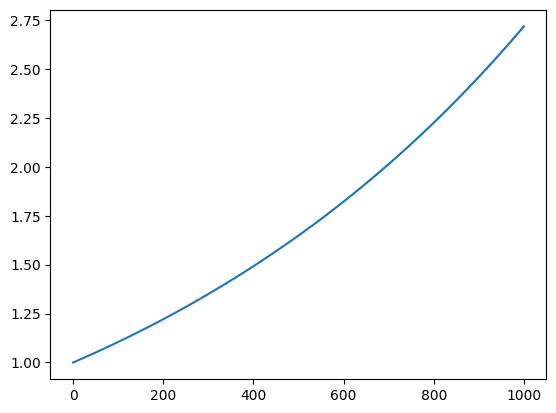

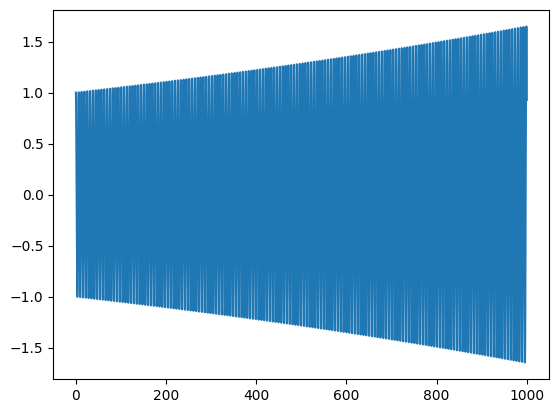

In [23]:
RE=E/E0
e=plt.plot(t,RE)
plt.show(e)
d=plt.plot(t,x)
plt.show(d)